###### Accommodation is the most important thing to find, when travelling to other city or country. Among the things to take into consideration while choosing it ,i will help you in the three following most important of them .

    -the best time of year to visit Seattle?
    -the best place for accommodation ?
    -which type of accommodation to choose ?
###### I will try to answer these questions by analyzing publicly accessible AirBnB data , available on Kaggle.

# imports 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
calendar = pd.read_csv('./data/calendar.csv')
listings = pd.read_csv('./data/listings.csv')
reviews = pd.read_csv('./data/reviews.csv')


# first look at data

In [6]:
calendar.head(5)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022194F0BC48>]],
      dtype=object)

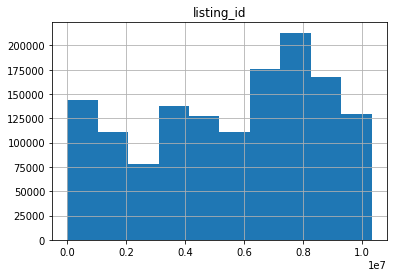

In [7]:
calendar.hist()

In [8]:
listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15


In [9]:
reviews.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [10]:
print(reviews.columns)
print("------------------------------------------------")
print(calendar.columns)
print("------------------------------------------------")
print(listings.columns)

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')
------------------------------------------------
Index(['listing_id', 'date', 'available', 'price'], dtype='object')
------------------------------------------------
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_clea

In [11]:
listings.drop(['price'],axis=1,inplace=True)
print(reviews.shape)
print(listings.shape)
print(calendar.shape)


(84849, 6)
(3818, 91)
(1393570, 4)


# first modification 

In [12]:
calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float)
calendar.head(3)

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN


### why dopna rows with price's nan
because in this project I want to predect price so we can't perdict a nan value 
and we can't replace it with a mean or something else because we want to predict it 

In [13]:
calendar['month'] = pd.DatetimeIndex(calendar['date']).month.astype(int)
calendar['year'] = pd.DatetimeIndex(calendar['date']).year.astype(int)
calendar=calendar[['listing_id', 'available', 'price','month','year']]
calendar = calendar.dropna(subset=['price'])
calendar.head(3)

,listing_id,available,price,month,year
0,241032,t,85.0,1,2016
1,241032,t,85.0,1,2016
9,241032,t,85.0,1,2016


In [14]:
listings = listings.rename(index=str, columns={"id": "listing_id"})
df = pd.merge(calendar, listings, on = 'listing_id')

In [15]:
df.shape

(934542, 95)

In [16]:
for col in list(df.columns.values) :
    print(col,len(pd.unique(df[col]).tolist()))

listing_id 3723
available 1
price 669
month 12
year 2
listing_url 3723
scrape_id 1
last_scraped 1
name 3699
summary 3386
space 3040
description 3647
experiences_offered 1
neighborhood_overview 2445
notes 1947
transit 2506
thumbnail_url 3410
medium_url 3410
picture_url 3723
xl_picture_url 3410
host_id 2677
host_url 2677
host_name 1435
host_since 1366
host_location 119
host_about 1962
host_response_time 5
host_response_rate 46
host_acceptance_rate 3
host_is_superhost 3
host_thumbnail_url 2670
host_picture_url 2670
host_neighbourhood 101
host_listings_count 28
host_total_listings_count 28
host_verifications 115
host_has_profile_pic 3
host_identity_verified 3
street 1422
neighbourhood 82
neighbourhood_cleansed 87
neighbourhood_group_cleansed 17
city 7
state 2
zipcode 29
market 1
smart_location 7
country_code 1
country 1
latitude 3723
longitude 3723
is_location_exact 2
property_type 17
room_type 3
accommodates 15
bathrooms 13
bedrooms 9
beds 12
bed_type 5
amenities 3208
square_feet 48
weekl

In [17]:
use_less = ['host_name','amenities','availability_60',  'summary', 'street','host_id','host_location','host_acceptance_rate','host_neighbourhood',
                   'host_total_listings_count', 'weekly_price', 'monthly_price',
                   'security_deposit', 'cleaning_fee', 'calendar_updated',
                   'listing_url','last_scraped' ,'scrape_id', 'name','space', 'description',
                   'experiences_offered',  'neighbourhood', 'neighbourhood_cleansed', 'zipcode',
                   'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
                   'xl_picture_url', 'host_url',  'host_about', 'host_thumbnail_url', 'host_picture_url',
                   'city', 'state', 'market', 'available','smart_location', 'country_code', 'country', 'latitude', 'longitude',
                   'is_location_exact', 'square_feet', 'has_availability', 'availability_30',
                    'availability_90', 'availability_365', 'calendar_last_scraped',
                  'first_review', 'last_review', 'requires_license', 'license', 'jurisdiction_names', 
                  'reviews_per_month','host_verifications']

In [18]:
df.drop(use_less,axis=1,inplace=True)
for col in list(df.columns.values) :
    print(col,len(pd.unique(df[col]).tolist()))

listing_id 3723
price 669
month 12
year 2
host_since 1366
host_response_time 5
host_response_rate 46
host_is_superhost 3
host_listings_count 28
host_has_profile_pic 3
host_identity_verified 3
neighbourhood_group_cleansed 17
property_type 17
room_type 3
accommodates 15
bathrooms 13
bedrooms 9
beds 12
bed_type 5
guests_included 15
extra_people 45
minimum_nights 21
maximum_nights 68
number_of_reviews 195
review_scores_rating 43
review_scores_accuracy 8
review_scores_cleanliness 9
review_scores_checkin 9
review_scores_communication 9
review_scores_location 7
review_scores_value 9
instant_bookable 2
cancellation_policy 3
require_guest_profile_picture 2
require_guest_phone_verification 2
calculated_host_listings_count 18


In [19]:
df.head()

,listing_id,price,month,year,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,241032,85.0,1,2016,2011-08-11,within a few hours,96%,f,3.0,t,...,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,2
1,241032,85.0,1,2016,2011-08-11,within a few hours,96%,f,3.0,t,...,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,2
2,241032,85.0,1,2016,2011-08-11,within a few hours,96%,f,3.0,t,...,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,2
3,241032,85.0,1,2016,2011-08-11,within a few hours,96%,f,3.0,t,...,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,2
4,241032,85.0,1,2016,2011-08-11,within a few hours,96%,f,3.0,t,...,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,2


In [20]:
df.describe()

,listing_id,price,month,year,host_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,...,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count
count,9.345420e+05,934542.000000,934542.000000,934542.000000,934450.000000,934542.000000,929739.000000,932539.000000,934177.000000,934542.000000,...,934542.000000,934542.000000,790005.000000,788000.000000,788613.000000,787724.000000,789050.000000,788526.000000,788428.000000,934542.000000
mean,5.305517e+06,137.944859,6.661120,2016.006097,8.432040,3.317107,1.258756,1.284918,1.729627,1.639393,...,786.780399,24.065168,94.413999,9.622782,9.547571,9.782761,9.803579,9.598126,9.427747,3.363974
std,2.974821e+06,105.062870,3.446401,0.077846,31.245915,1.997961,0.582572,0.847862,1.153730,1.267317,...,1072.300898,39.802954,6.421041,0.704792,0.795431,0.578456,0.561913,0.629512,0.739723,6.729892
min,3.335000e+03,10.000000,1.000000,2016.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,1.000000
25%,2.875975e+06,75.000000,4.000000,2016.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,90.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000
50%,5.615620e+06,109.000000,7.000000,2016.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,1125.000000,10.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000
75%,7.873345e+06,160.000000,10.000000,2016.000000,3.000000,4.000000,1.000000,2.000000,2.000000,2.000000,...,1125.000000,29.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000
max,1.034016e+07,1650.000000,12.000000,2017.000000,502.000000,16.000000,8.000000,7.000000,15.000000,15.000000,...,100000.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,37.000000


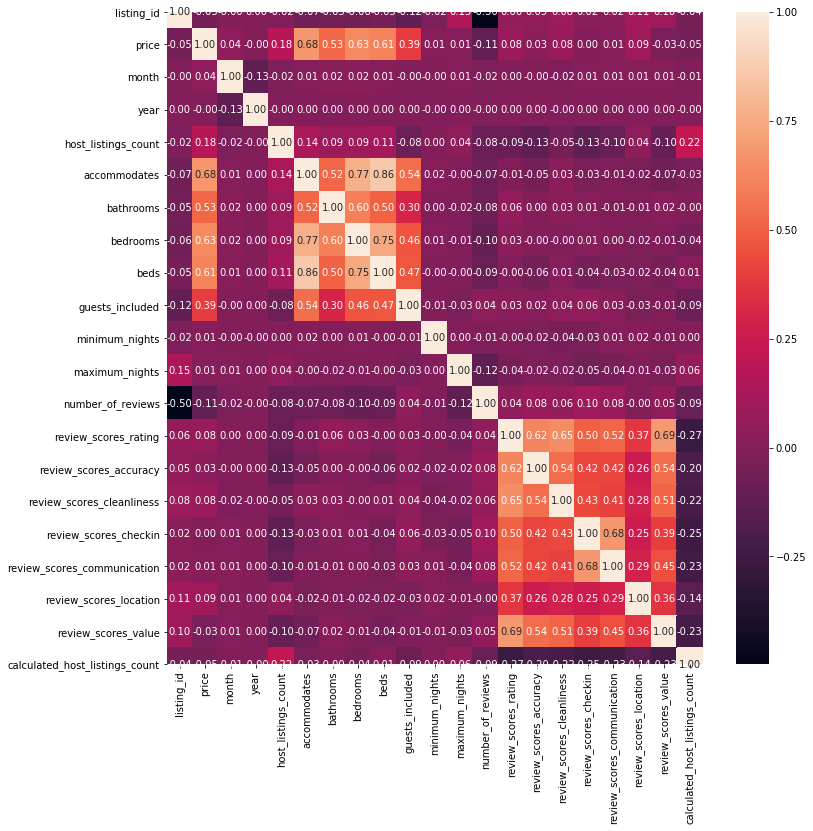

In [21]:

plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, fmt=".2f");

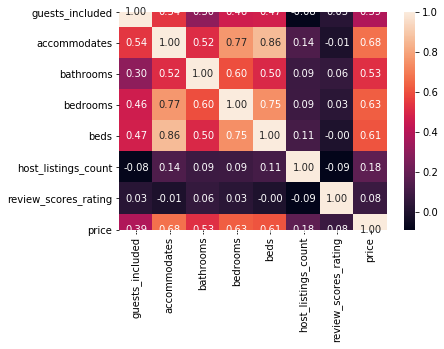

In [22]:
cols = ['guests_included','accommodates','bathrooms','bedrooms','beds',
        'host_listings_count', 'extra_people',
        'review_scores_rating', 'price']
sns.heatmap(df[cols].corr(), annot=True, fmt=".2f");

### Which type of accommodation to choose ?
It is not only the places and neighborhoods that vary the price, there is also the type of accommodation.
yes it’s not the same if you spend your stay in a chalet or in a small apartment

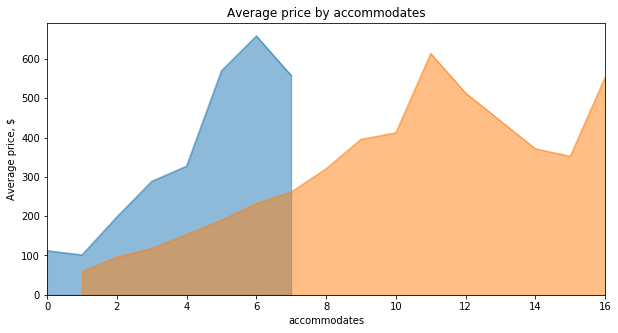

In [30]:
price_by_accommodates = df.groupby(['accommodates'])['price'].mean()
price_by_bedRooms = df.groupby(['bedrooms'])['price'].mean()
#plot
plt.figure(figsize=(10,5))
#plt.plot(price_by_accommodates)
price_by_bedRooms.plot.area(stacked=False);
price_by_accommodates.plot.area(stacked=False);
plt.ylabel('Average price, $')
plt.xlabel('accommodates')
plt.title('Average price by accommodates')

plt.savefig('price by accommodates')

plt.show()

### The best time of year to visit Seattle?
when i talk about the best time of the year to visit Seattle, it was of course compared to the prices of accommodation, because yes the price is not the same throughout the year.
here a visualization that I made by a port at the average price for each month of 2016.

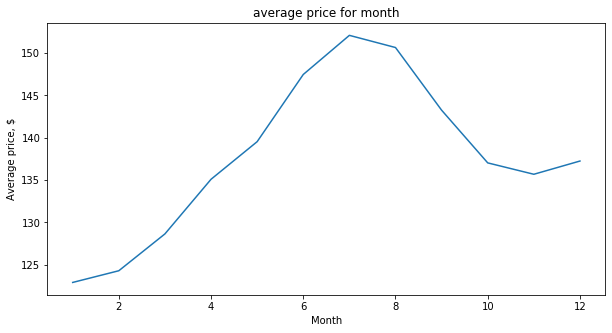

In [24]:
price_by_month = df.groupby(['month'])['price'].mean()

#plot
plt.figure(figsize=(10,5))
plt.plot(price_by_month)
plt.ylabel('Average price, $')
plt.xlabel('Month')
plt.title('average price for month')

plt.savefig('average price for month')

plt.show()

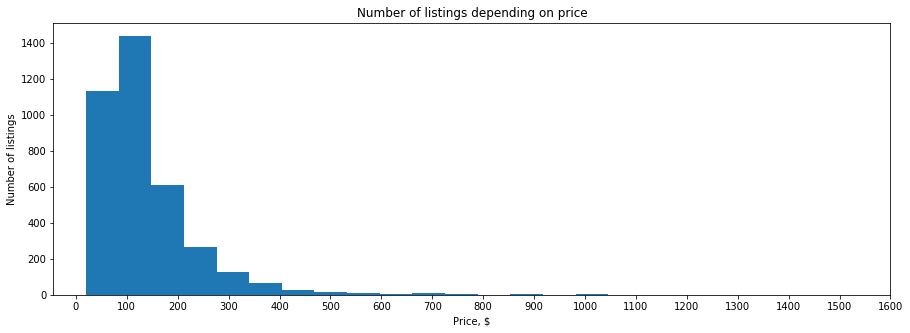

In [25]:
mean_price_for_listing = df.groupby('listing_id').mean()['price']

#plot
plt.figure(figsize=(15,5))
plt.hist(mean_price_for_listing, stacked=True ,bins=20)
plt.xticks(np.arange(0, 1700, step=100))
plt.ylabel('Number of listings')
plt.xlabel('Price, $')
plt.title('Number of listings depending on price')


plt.savefig('Price distrubution.png')

plt.show()

### The best place for accommodation ?
Yes, as mentioned in the question, the neighborhood plays a role in raising prices. here is a graph that links the price range by district

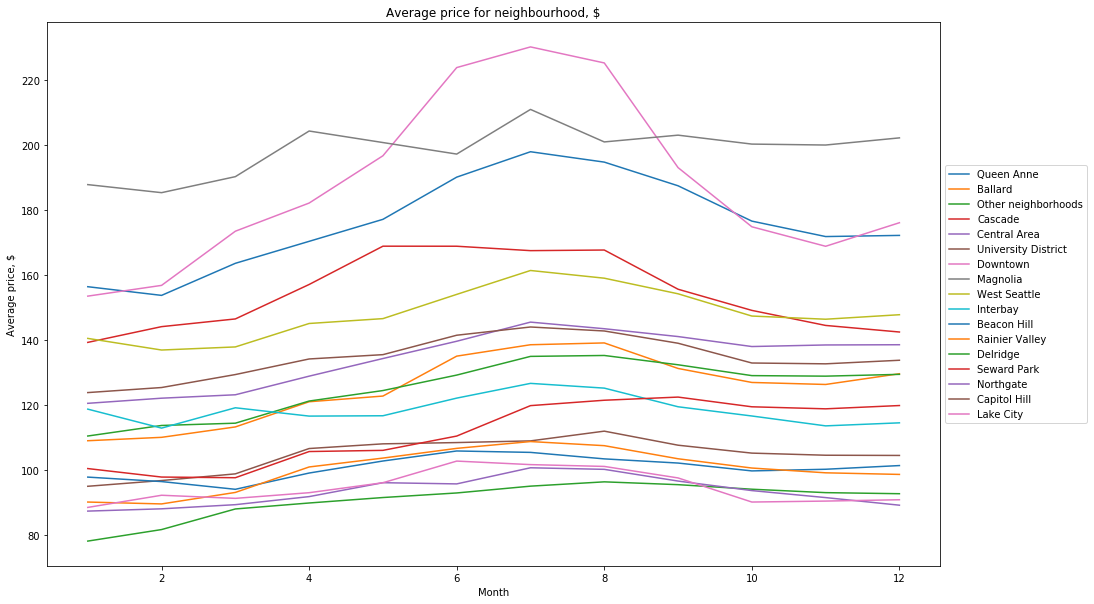

In [26]:
#get list of neighbourhoods
neighbourhoods = df['neighbourhood_group_cleansed'].unique()

#get prices by month and neighbourhood
price_by_month_neighbourhood = df.groupby(['month','neighbourhood_group_cleansed']).mean().reset_index()

#plot prices for each neighbourhood
fig = plt.figure(figsize=(20,10))
ax = plt.subplot(111)

for neighbourhood in neighbourhoods:
    ax.plot(price_by_month_neighbourhood[price_by_month_neighbourhood['neighbourhood_group_cleansed'] == neighbourhood]['month'],
             price_by_month_neighbourhood[price_by_month_neighbourhood['neighbourhood_group_cleansed'] == neighbourhood]['price'],
             label = neighbourhood)
    
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.ylabel('Average price, $')
plt.xlabel('Month')
plt.title('Average price for neighbourhood, $')

plt.savefig('average price for neighbourhood')

plt.show()

In [27]:
df.describe()

,listing_id,price,month,year,host_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,...,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count
count,9.345420e+05,934542.000000,934542.000000,934542.000000,934450.000000,934542.000000,929739.000000,932539.000000,934177.000000,934542.000000,...,934542.000000,934542.000000,790005.000000,788000.000000,788613.000000,787724.000000,789050.000000,788526.000000,788428.000000,934542.000000
mean,5.305517e+06,137.944859,6.661120,2016.006097,8.432040,3.317107,1.258756,1.284918,1.729627,1.639393,...,786.780399,24.065168,94.413999,9.622782,9.547571,9.782761,9.803579,9.598126,9.427747,3.363974
std,2.974821e+06,105.062870,3.446401,0.077846,31.245915,1.997961,0.582572,0.847862,1.153730,1.267317,...,1072.300898,39.802954,6.421041,0.704792,0.795431,0.578456,0.561913,0.629512,0.739723,6.729892
min,3.335000e+03,10.000000,1.000000,2016.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,1.000000
25%,2.875975e+06,75.000000,4.000000,2016.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,90.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000
50%,5.615620e+06,109.000000,7.000000,2016.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,1125.000000,10.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000
75%,7.873345e+06,160.000000,10.000000,2016.000000,3.000000,4.000000,1.000000,2.000000,2.000000,2.000000,...,1125.000000,29.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000
max,1.034016e+07,1650.000000,12.000000,2017.000000,502.000000,16.000000,8.000000,7.000000,15.000000,15.000000,...,100000.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,37.000000


# cleaning Data

In [28]:
df.head(3)

,listing_id,price,month,year,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,241032,85.0,1,2016,2011-08-11,within a few hours,96%,f,3.0,t,...,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,2
1,241032,85.0,1,2016,2011-08-11,within a few hours,96%,f,3.0,t,...,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,2
2,241032,85.0,1,2016,2011-08-11,within a few hours,96%,f,3.0,t,...,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,2


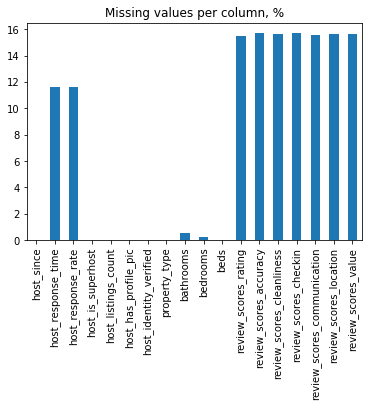

In [29]:
listings_missing_df = df.isnull().mean()*100

#filter out only columns, which have missing values
listings_columns_with_nan = listings_missing_df[listings_missing_df > 0]

#plot the results
listings_columns_with_nan.plot.bar(title='Missing values per column, %')

In [157]:
df.dropna(subset=['price'],axis=0,inplace=True)

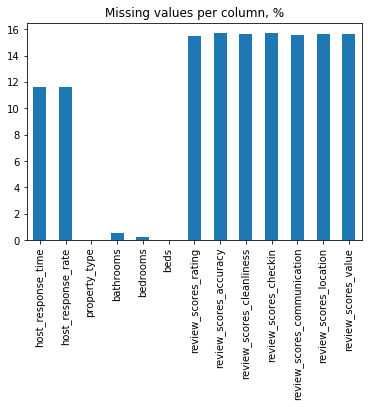

In [158]:
df.dropna(subset=['host_since'],axis=0,inplace=True)
listings_missing_df = df.isnull().mean()*100

#filter out only columns, which have missing values
listings_columns_with_nan = listings_missing_df[listings_missing_df > 0]

#plot the results
listings_columns_with_nan.plot.bar(title='Missing values per column, %')

In [159]:
df.shape

(934450, 36)

In [160]:
df.columns

Index(['listing_id', 'price', 'month', 'year', 'host_since',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_listings_count', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count'],
      dtype='object')

In [161]:
cols_with_missing_values=['host_response_time','host_response_rate','property_type','bathrooms','bedrooms','beds',
                          'review_scores_accuracy','review_scores_rating','review_scores_cleanliness',
                          'review_scores_checkin','review_scores_communication','review_scores_value',
                          'review_scores_location']

df_with_missing_values =df[cols_with_missing_values]
df_with_missing_values.head()

,host_response_time,host_response_rate,property_type,bathrooms,bedrooms,beds,review_scores_accuracy,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_value,review_scores_location
0,within a few hours,96%,Apartment,1.0,1.0,1.0,10.0,95.0,10.0,10.0,10.0,10.0,9.0
1,within a few hours,96%,Apartment,1.0,1.0,1.0,10.0,95.0,10.0,10.0,10.0,10.0,9.0
2,within a few hours,96%,Apartment,1.0,1.0,1.0,10.0,95.0,10.0,10.0,10.0,10.0,9.0
3,within a few hours,96%,Apartment,1.0,1.0,1.0,10.0,95.0,10.0,10.0,10.0,10.0,9.0
4,within a few hours,96%,Apartment,1.0,1.0,1.0,10.0,95.0,10.0,10.0,10.0,10.0,9.0


In [162]:
df_with_missing_values['host_response_time'] = df_with_missing_values['host_response_time'].fillna(df_with_missing_values['host_response_time'].mode()[0])
df_with_missing_values['property_type'] = df_with_missing_values['property_type'].fillna(df_with_missing_values['property_type'].mode()[0])
df_with_missing_values['host_response_rate'] = df_with_missing_values['host_response_rate'].fillna(df_with_missing_values['host_response_rate'].mode()[0])
df_with_missing_values.head()

C:\Users\hider\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\hider\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\hider\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

,host_response_time,host_response_rate,property_type,bathrooms,bedrooms,beds,review_scores_accuracy,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_value,review_scores_location
0,within a few hours,96%,Apartment,1.0,1.0,1.0,10.0,95.0,10.0,10.0,10.0,10.0,9.0
1,within a few hours,96%,Apartment,1.0,1.0,1.0,10.0,95.0,10.0,10.0,10.0,10.0,9.0
2,within a few hours,96%,Apartment,1.0,1.0,1.0,10.0,95.0,10.0,10.0,10.0,10.0,9.0
3,within a few hours,96%,Apartment,1.0,1.0,1.0,10.0,95.0,10.0,10.0,10.0,10.0,9.0
4,within a few hours,96%,Apartment,1.0,1.0,1.0,10.0,95.0,10.0,10.0,10.0,10.0,9.0


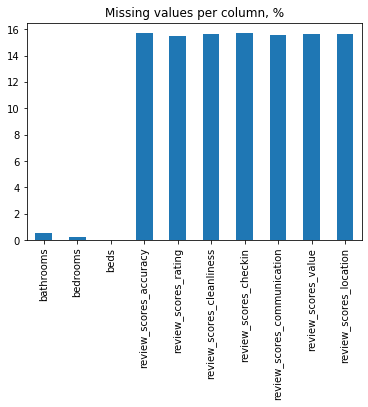

In [163]:
listings_missing_df = df_with_missing_values.isnull().mean()*100

#filter out only columns, which have missing values
listings_columns_with_nan = listings_missing_df[listings_missing_df > 0]

#plot the results
listings_columns_with_nan.plot.bar(title='Missing values per column, %')

In [164]:
df_with_missing_values['review_scores_accuracy'].fillna(df_with_missing_values['review_scores_accuracy'].mean(), inplace = True)
df_with_missing_values['bathrooms'].fillna(df_with_missing_values['bathrooms'].mean(), inplace = True)
df_with_missing_values['bedrooms'].fillna(df_with_missing_values['bedrooms'].mean(), inplace = True)
df_with_missing_values['beds'].fillna(df_with_missing_values['beds'].mean(), inplace = True)
df_with_missing_values['review_scores_accuracy'].fillna(df_with_missing_values['review_scores_accuracy'].mean(), inplace = True)
df_with_missing_values['review_scores_cleanliness'].fillna(df_with_missing_values['review_scores_cleanliness'].mean(), inplace = True)
df_with_missing_values['review_scores_checkin'].fillna(df_with_missing_values['review_scores_checkin'].mean(), inplace = True)
df_with_missing_values['review_scores_communication'].fillna(df_with_missing_values['review_scores_communication'].mean(), inplace = True)
df_with_missing_values['review_scores_value'].fillna(df_with_missing_values['review_scores_value'].mean(), inplace = True)
df_with_missing_values['review_scores_location'].fillna(df_with_missing_values['review_scores_location'].mean(), inplace = True)
df_with_missing_values['review_scores_rating'].fillna(df_with_missing_values['review_scores_value'].mean(), inplace = True)
df_with_missing_values.head()

C:\Users\hider\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,host_response_time,host_response_rate,property_type,bathrooms,bedrooms,beds,review_scores_accuracy,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_value,review_scores_location
0,within a few hours,96%,Apartment,1.0,1.0,1.0,10.0,95.0,10.0,10.0,10.0,10.0,9.0
1,within a few hours,96%,Apartment,1.0,1.0,1.0,10.0,95.0,10.0,10.0,10.0,10.0,9.0
2,within a few hours,96%,Apartment,1.0,1.0,1.0,10.0,95.0,10.0,10.0,10.0,10.0,9.0
3,within a few hours,96%,Apartment,1.0,1.0,1.0,10.0,95.0,10.0,10.0,10.0,10.0,9.0
4,within a few hours,96%,Apartment,1.0,1.0,1.0,10.0,95.0,10.0,10.0,10.0,10.0,9.0


# dummy variables 

In [165]:
df.drop(cols_with_missing_values,axis=1,inplace=True)

In [166]:
for col in df_with_missing_values.columns :
    df[col]=df_with_missing_values[col]

In [167]:
df.shape

(934450, 36)

In [168]:
df['host_response_rate'] = df['host_response_rate'].replace('[\%,]', '', regex=True).astype(float)
df['year_sice'] = pd.DatetimeIndex(df['host_since']).year.astype(int)
df.drop(['host_since'],axis=1,inplace=True)
df.head()

,listing_id,price,month,year,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,room_type,...,bedrooms,beds,review_scores_accuracy,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_value,review_scores_location,year_sice
0,241032,85.0,1,2016,f,3.0,t,t,Queen Anne,Entire home/apt,...,1.0,1.0,10.0,95.0,10.0,10.0,10.0,10.0,9.0,2011
1,241032,85.0,1,2016,f,3.0,t,t,Queen Anne,Entire home/apt,...,1.0,1.0,10.0,95.0,10.0,10.0,10.0,10.0,9.0,2011
2,241032,85.0,1,2016,f,3.0,t,t,Queen Anne,Entire home/apt,...,1.0,1.0,10.0,95.0,10.0,10.0,10.0,10.0,9.0,2011
3,241032,85.0,1,2016,f,3.0,t,t,Queen Anne,Entire home/apt,...,1.0,1.0,10.0,95.0,10.0,10.0,10.0,10.0,9.0,2011
4,241032,85.0,1,2016,f,3.0,t,t,Queen Anne,Entire home/apt,...,1.0,1.0,10.0,95.0,10.0,10.0,10.0,10.0,9.0,2011


In [170]:
cat_vars = df.select_dtypes(include=['object']).copy().columns
for col in cat_vars :
    print(col,len(pd.unique(df[col]).tolist()))

host_is_superhost 2
host_has_profile_pic 2
host_identity_verified 2
neighbourhood_group_cleansed 17
room_type 3
bed_type 5
extra_people 45
instant_bookable 2
cancellation_policy 3
require_guest_profile_picture 2
require_guest_phone_verification 2
host_response_time 4
property_type 16


In [174]:
df['property_type'].unique()

array(['Apartment', 'House', 'Cabin', 'Condominium', 'Camper/RV',
       'Bungalow', 'Townhouse', 'Loft', 'Boat', 'Bed & Breakfast',
       'Other', 'Dorm', 'Treehouse', 'Yurt', 'Chalet', 'Tent'],
      dtype=object)

In [175]:
    
# Dummy the categorical variables
cat_vars = df.select_dtypes(include=['object']).copy().columns
for var in  cat_vars:
    # for each cat add dummy var, drop original column
    df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    

In [176]:
df.head()

,listing_id,price,month,year,host_listings_count,accommodates,guests_included,minimum_nights,maximum_nights,number_of_reviews,...,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt
0,241032,85.0,1,2016,3.0,4,2,1,365,207,...,0,0,0,0,0,0,0,0,0,0
1,241032,85.0,1,2016,3.0,4,2,1,365,207,...,0,0,0,0,0,0,0,0,0,0
2,241032,85.0,1,2016,3.0,4,2,1,365,207,...,0,0,0,0,0,0,0,0,0,0
3,241032,85.0,1,2016,3.0,4,2,1,365,207,...,0,0,0,0,0,0,0,0,0,0
4,241032,85.0,1,2016,3.0,4,2,1,365,207,...,0,0,0,0,0,0,0,0,0,0


In [178]:
df.shape

(934450, 115)

In [180]:
labelSet=df['price']
dataSet= df.drop('price',axis=1)


In [181]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [243]:
data_train, data_test, label_train, label_test = train_test_split(dataSet, labelSet, test_size = .30) 

In [244]:
lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(data_train, label_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [245]:
label_test_preds = lm_model.predict(data_test) 

In [246]:
rsquared_score = r2_score(label_test, label_test_preds)
length_y_test = len(label_test)

In [247]:
print(length_y_test)

280335


In [248]:
rsquared_score

0.6378306572092731

In [249]:
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

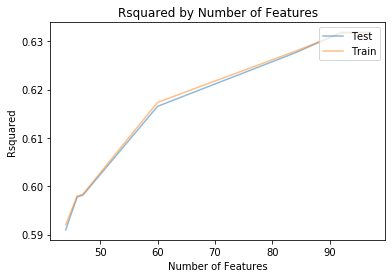

In [252]:
cutoffs = [50000, 35000, 25000, 10000, 1000, 500, 300]

r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(data_train, label_train, cutoffs)

### Conclusion
This message is not there to tell you to choose the cheapest or largest accommodation. this post is the result of a study I did and that I wanted to share with you in the hope that it will help you if you plan to visit Seattle one day, indeed the purpose of this little article is to help you to organize you according to your needs… .
for more information you can visit my git Hub or contact me via linked in